## Setup

In [15]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

def func(x:float):
    return x**2-4*x+1

def gradient_func(x:float):
    return 2*x - 4

def random_initialize():
    x = randint(-20, 20)
    return x

def build_function():
    x = np.arange(-20., 20., 0.2)
    y = np.array([func(val) for val in x])
    return x,y

## Regular Gradient Descent

$$
\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta)
$$

Step0 : X = 10.0, Y= 97
Step1 : X = 8.4, Y= 61.0
Step2 : X = 7.12, Y= 37.96
Step3 : X = 6.096, Y= 23.2144
Step4 : X = 5.2768, Y= 13.777216000000003
Step5 : X = 4.62144, Y= 7.737418239999997
Step6 : X = 4.0971519999999995, Y= 3.8719476735999976
Step7 : X = 3.6777215999999995, Y= 1.398046511103999
Step8 : X = 3.3421772799999996, Y= -0.18525023289344134
Step9 : X = 3.073741824, Y= -1.1985601490518025
Step10 : X = 2.8589934591999997, Y= -1.8470784953931538
Step11 : X = 2.68719476736, Y= -2.2621302370516183
Step12 : X = 2.549755813888, Y= -2.527763351713036
Step13 : X = 2.4398046511104, Y= -2.697768545096343
Step14 : X = 2.35184372088832, Y= -2.806571868861659
Step15 : X = 2.2814749767106557, Y= -2.8762059960714623
Step16 : X = 2.2251799813685245, Y= -2.920771837485736
Step17 : X = 2.1801439850948197, Y= -2.949293975990871
Step18 : X = 2.1441151880758555, Y= -2.967548144634158
Step19 : X = 2.1152921504606845, Y= -2.979230812565861
Step20 : X = 2.0922337203685477, Y= -2.9867077200421512
Step

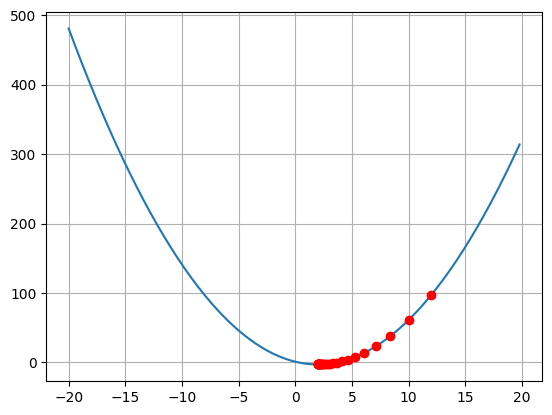

In [17]:
def step(x,r):
    x = x - r * gradient_func(x)
    return x

def gradient_descent(steps=10, r=0.1, print_res=True, initalRandom=True, initalX=10 ): # initalX is chosen as a starting coordinate when initalRandom is False
    x,y = build_function()
    plt.plot(x,y)
    
    if initalRandom:
        cur_x = random_initialize()
    else:
        cur_x = initalX
    
    for i in range(steps):
        cur_y = func(cur_x)
        plt.plot(cur_x, cur_y, color='red', marker='o')
        cur_x = step(cur_x, r)
        if print_res:
            print("Step" + str(i) + " : X = " + str(cur_x) + ", Y= " + str(cur_y))

    plt.grid()
    plt.show()

gradient_descent(steps=30)

## Momentum Optimization

$$
m \leftarrow \beta m - \eta \nabla_{\theta} J(\theta) \\
\theta \leftarrow \theta + m
$$

Step0 : X = 11.0, Y= 97
Step1 : X = 9.5, Y= 78.0
Step2 : X = 7.85, Y= 53.25
Step3 : X = 6.275, Y= 31.222499999999997
Step4 : X = 4.902500000000001, Y= 15.275625000000005
Step5 : X = 3.7887500000000007, Y= 5.424506250000004
Step6 : X = 2.9416250000000006, Y= 0.19962656250000244
Step7 : X = 2.3391875000000004, Y= -2.1133423593749985
Step8 : X = 1.9438062500000004, Y= -2.88495183984375
Step9 : X = 1.7121968750000003, Y= -2.9968422624609374
Step10 : X = 1.6020115625000002, Y= -2.9171693612402345
Step11 : X = 1.57569921875, Y= -2.8416052036163086
Step12 : X = 1.602341890625, Y= -2.8199688470306397
Step13 : X = 1.6580933046875, Y= -2.8418680280483004
Step14 : X = 1.72573482265625, Y= -2.883099811700485
Step15 : X = 1.793746251171875, Y= -2.9247786124966013
Step16 : X = 1.8551784831640625, Y= -2.9574593910943445
Step17 : X = 1.9065199740429688, Y= -2.979026728261338
Step18 : X = 1.9466728711660157, Y= -2.991261484747073
Step19 : X = 1.9760973223232423, Y= -2.9971562173303234
Step20 : X = 1.99

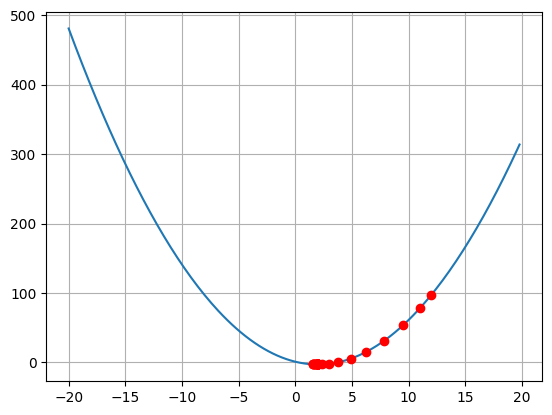

In [18]:
def momentum_step(x,r,b,m):
    m = b*m - r * gradient_func(x)
    x = x + m
    return m,x

def momentum_gradient_descent(steps=10, r=0.1, beta=0.1, print_res=True, initalRandom=True, initalX=10): # initalX is chosen as a starting coordinate when initalRandom is False
    x,y = build_function()
    plt.plot(x,y)
    if initalRandom:
        cur_x = random_initialize()
    else:
        cur_x = initalX
    
    momentum = 0
    for i in range(steps):
        cur_y = func(cur_x)
        plt.plot(cur_x, cur_y, color='red', marker='o')
        momentum, cur_x = momentum_step(cur_x, r, beta, momentum)
        if print_res:
            print("Step" + str(i) + " : X = " + str(cur_x) + ", Y= " + str(cur_y))

    plt.grid()
    plt.show()

momentum_gradient_descent(steps=30, r=0.05, beta=0.6)
